# Housing Prices Prediction

Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import sklearn as skl

raw = pd.read_csv('train.csv')
raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Cleaning the Data

Since many of the catagorical features occur in discrete, numerically observerable ratings, it might be useful to encode them prior to using something like pd.get_dummies(). Encoding standards taken from:
<data_descriptions.txt>

In [2]:
# Make more legible
dwelling_types = {20: '1-S Y>=1946', 30: '1-S Y<=1945', 40: '1-S Finished Attic',
                  45: '1.5-S Y>=1946 Unfinished', 50: '1.5-S Finished', 60: '2-S Y>=1946',
                  70: '2-S Y<=1945', 75: '2.5-S', 80: 'Split/Multilevel',
                  85: 'Split Foyer', 90: 'Duplex', 120: '1-S PUD Y>=1946',
                  150: '1.5-S PUD', 160: '2-S PUD Y>=1946', 180: 'Split/Multilevel PUD',
                  190: '2FamConver'}
raw['DwellingType'] = raw['MSSubClass'].apply(lambda x: dwelling_types[x])

# Encode Boolean-like and other observably discrete variables numerically
standard_quality = {np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
basement_finishing_rating = {np.nan: 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
pavings = {np.nan: 0, 'Grvl': 1, 'Pave': 2}

raw['Paved_Streets'] = raw['Street'].apply(lambda x: pavings[x])
raw['Alley_Access'] = raw['Alley'].apply(lambda x: pavings[x])
raw['Num_Available_Utils'] = raw['Utilities'].apply(lambda x: {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4}[x])
raw['Slope_Coeff'] = raw['LandSlope'].apply(lambda x: {'Gtl': 1, 'Mod': 2, 'Sev': 3}[x])
raw['Ext_Quality'] = raw['ExterQual'].apply(lambda x: standard_quality[x])
raw['Ext_Condition'] = raw['ExterCond'].apply(lambda x: standard_quality[x])

raw['Bsmt_Quality'] = raw['BsmtQual'].apply(lambda x: standard_quality[x])
raw['Bsmt_Condition'] = raw['BsmtCond'].apply(lambda x: standard_quality[x])
raw['Bsment_Expo'] = raw['BsmtExposure'].apply(lambda x: {np.nan: 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}[x])
raw['Bsmt_Fin_Type1'] = raw['BsmtFinType1'].apply(lambda x: basement_finishing_rating[x])
raw['Bsmt_Fin_Type2'] = raw['BsmtFinType2'].apply(lambda x: basement_finishing_rating[x])

raw['Heating_Quality'] = raw['HeatingQC'].apply(lambda x: standard_quality[x])
raw['CAC'] = raw['CentralAir'].apply(lambda x: {'N': 0, 'Y': 1}[x])

raw['Kitchen_Quality'] = raw['KitchenQual'].apply(lambda x: standard_quality[x])
raw['Fireplace_Quality'] = raw['FireplaceQu'].apply(lambda x: standard_quality[x])

raw['Garage_Finish_Rating'] = raw['GarageFinish'].apply(lambda x: {np.nan: 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}[x])
raw['Garage_Quality'] = raw['GarageQual'].apply(lambda x: standard_quality[x])
raw['Garage_Condition'] = raw['GarageCond'].apply(lambda x: standard_quality[x])
raw['Driveway_Paving'] = raw['PavedDrive'].apply(lambda x: {'N': 0, 'P': 1, 'Y': 2}[x])

raw['Pool_Quality'] = raw['PoolQC'].apply(lambda x: standard_quality[x])

raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Bsmt_Fin_Type2,Heating_Quality,CAC,Kitchen_Quality,Fireplace_Quality,Garage_Finish_Rating,Garage_Quality,Garage_Condition,Driveway_Paving,Pool_Quality
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1,5,1,4,0,2,3,3,2,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,1,5,1,3,3,2,3,3,2,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1,5,1,4,3,2,3,3,2,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,1,4,1,4,4,1,3,3,2,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,1,5,1,4,3,2,3,3,2,0


In [3]:
# Remove duplicate info
cols_to_remove = ['Street', 'Alley', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 
                 'GarageFinish', 'GarageQual', 'PavedDrive', 'PoolQC',
                 'Id', 'MSSubClass']
semiraw = raw.drop(cols_to_remove, axis=1)
semiraw.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,...,Bsmt_Fin_Type2,Heating_Quality,CAC,Kitchen_Quality,Fireplace_Quality,Garage_Finish_Rating,Garage_Quality,Garage_Condition,Driveway_Paving,Pool_Quality
0,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,...,1,5,1,4,0,2,3,3,2,0
1,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,...,1,5,1,3,3,2,3,3,2,0
2,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,...,1,5,1,4,3,2,3,3,2,0
3,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,...,1,4,1,4,4,1,3,3,2,0
4,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,...,1,5,1,4,3,2,3,3,2,0


In [4]:
def separate_num_and_cat_data(df):
    num_cols, cat_cols = [], []
    for x in df.columns:
        if df[x].dtype == 'object':
            cat_cols.append(x)
        else:
            num_cols.append(x)
    return num_cols, cat_cols

numerical_cols, catagorical_cols = separate_num_and_cat_data(semiraw)

num_data = semiraw[numerical_cols]
dummy = pd.get_dummies(semiraw[catagorical_cols])

df = pd.concat([num_data, dummy], axis=1).dropna()
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,DwellingType_1.5-S Y>=1946 Unfinished,DwellingType_2-S PUD Y>=1946,DwellingType_2-S Y<=1945,DwellingType_2-S Y>=1946,DwellingType_2.5-S,DwellingType_2FamConver,DwellingType_Duplex,DwellingType_Split Foyer,DwellingType_Split/Multilevel,DwellingType_Split/Multilevel PUD
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,0,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,0,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,1,0,0,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,0,0


## Information and DataViz

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Columns: 251 entries, LotFrontage to DwellingType_Split/Multilevel PUD
dtypes: float64(3), int64(53), uint8(195)
memory usage: 712.7 KB


In [6]:
df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,DwellingType_1.5-S Y>=1946 Unfinished,DwellingType_2-S PUD Y>=1946,DwellingType_2-S Y<=1945,DwellingType_2-S Y>=1946,DwellingType_2.5-S,DwellingType_2FamConver,DwellingType_Duplex,DwellingType_Split Foyer,DwellingType_Split/Multilevel,DwellingType_Split/Multilevel PUD
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.00000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,70.665477,10122.956289,6.212310,5.561106,1972.264942,1985.683318,108.487957,438.399643,44.589652,594.125781,...,0.008029,0.047279,0.046387,0.20339,0.011597,0.016949,0.031222,0.012489,0.033898,0.005352
std,24.266812,8129.302641,1.380822,1.068236,30.967730,21.025974,189.500966,468.385038,157.828725,450.259657,...,0.089282,0.212330,0.210416,0.40270,0.107110,0.129139,0.173995,0.111103,0.181048,0.072996
min,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7590.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,250.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,9416.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,374.000000,0.000000,506.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11361.000000,7.000000,6.000000,2003.000000,2005.000000,170.000000,702.000000,0.000000,840.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


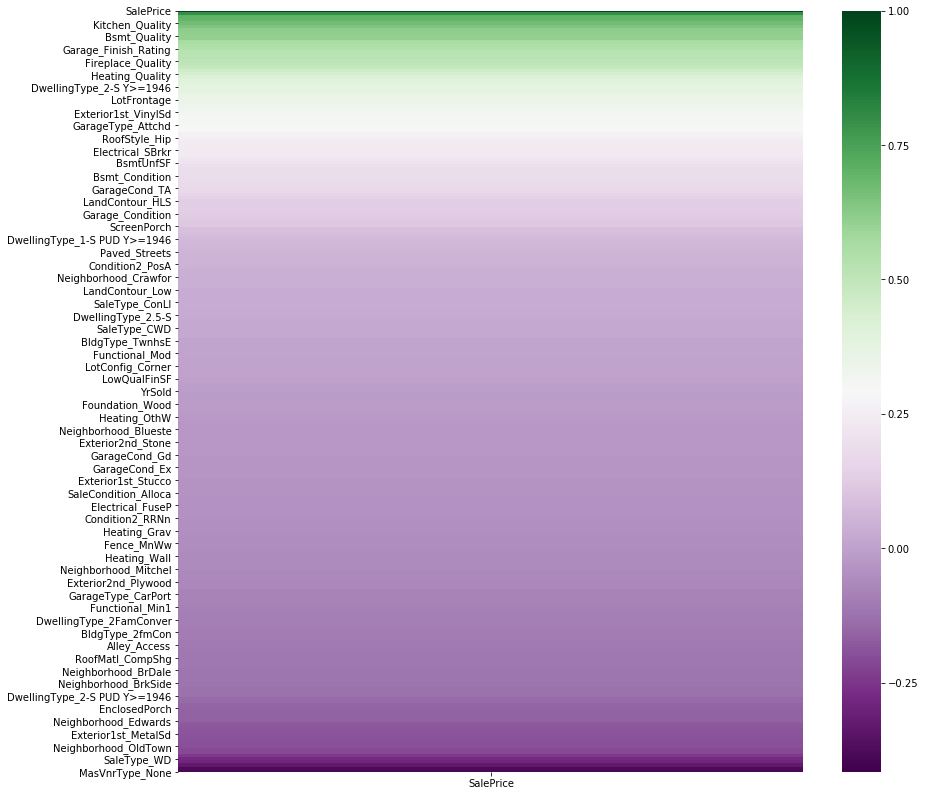

In [7]:
# Visualize Correlations to SalePrice
sales_correlations = df.corr().loc['SalePrice'].to_frame().sort_values(by='SalePrice').dropna()[::-1]
fig, ax = plt.subplots(figsize=(14, 14))
sb.heatmap(data=sales_correlations, cmap='PRGn', ax=ax)
plt.show()

In [8]:
# What are the biggest factors to Sale Price?
sales_correlations.head(11)

,SalePrice
SalePrice,1.000000
OverallQual,0.797881
GrLivArea,0.705154
Ext_Quality,0.699595
Kitchen_Quality,0.670699
GarageCars,0.647034
GarageArea,0.619330
TotalBsmtSF,0.615612
Bsmt_Quality,0.612307
1stFlrSF,0.607969


In [9]:
strong_Xcorr_factors = list(sales_correlations.head(11).T.columns)
strong_Xcorr_factors.remove('SalePrice')
strong_Xcorr_factors

['OverallQual',
 'GrLivArea',
 'Ext_Quality',
 'Kitchen_Quality',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 'Bsmt_Quality',
 '1stFlrSF',
 'FullBath']

So, it looks like overall Build Quality (inside & out), Above-ground Living Area (Sq Ft), Kitchen Quality, Garage Area (and car capacity), Basement Area & Quality, 1st Floor Area, and number of Above-ground Full Baths are the biggest factors in determining Sale Price. 

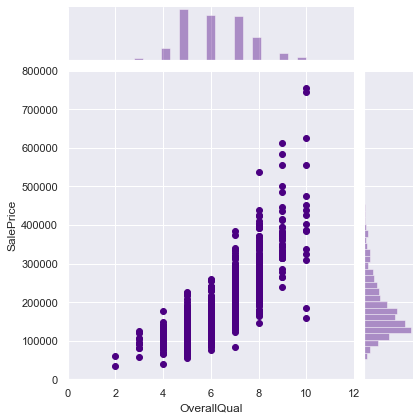

In [10]:
sb.set(style='darkgrid', color_codes=True)
sb.jointplot(x='OverallQual', y='SalePrice', data=df, color='indigo',
            xlim=[0, 12], ylim=[0, 800000])
plt.show()

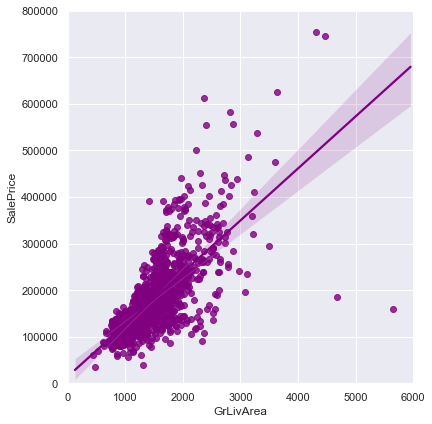

In [11]:
sb.set(style='darkgrid', color_codes=True)
sb.lmplot(x='GrLivArea', y='SalePrice', data=df, height=6,
         scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})
plt.xlim(0, 6000), plt.ylim(0, 800000)
plt.show()

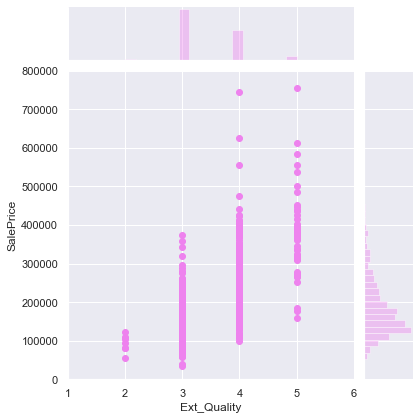

In [12]:
sb.jointplot(x='Ext_Quality', y='SalePrice', data=df, color='violet',
            xlim=[1, 6], ylim=[0, 800000])
plt.show()

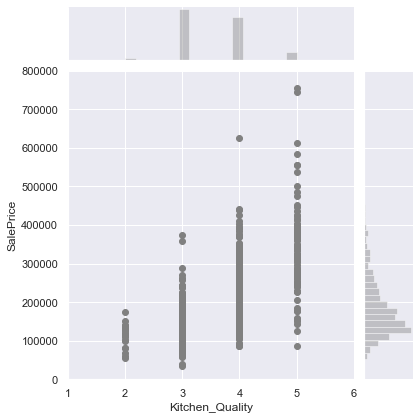

In [13]:
sb.jointplot(x='Kitchen_Quality', y='SalePrice', data=df, color='gray',
            xlim=[1, 6], ylim=[0, 800000])
plt.show()

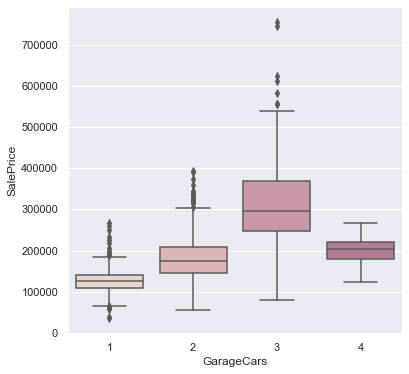

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
sb.boxplot(x='GarageCars', y='SalePrice', data=df, palette=sb.cubehelix_palette(8))
plt.show()

## ML Imports & Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
X = df[strong_Xcorr_factors]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)
coefficients = lm.coef_

predictions = lm.predict(X_test)

In [24]:
cdf = pd.DataFrame(coefficients, strong_Xcorr_factors, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
cdf

,Coefficient
OverallQual,19667.204778
Kitchen_Quality,16978.439130
Bsmt_Quality,16067.733985
GarageCars,11266.986041
Ext_Quality,9646.366867
FullBath,2532.941176
1stFlrSF,47.816660
GrLivArea,15.232552
GarageArea,7.784131
TotalBsmtSF,-37.269691


## Evaluation

In [31]:
print('MAE: {:,.2f}'.format(mean_absolute_error(y_test, predictions)))
print('MSE: {:,.2f}'.format(mean_squared_error(y_test, predictions)))
print('RMSE: {:,.2f}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

MAE: 24,924.31
MSE: 1,571,255,522.03
RMSE: 39,639.07


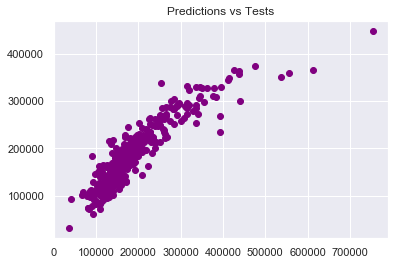

In [32]:
plt.scatter(y_test, predictions, c='purple')
plt.title('Predictions vs Tests')
plt.show()

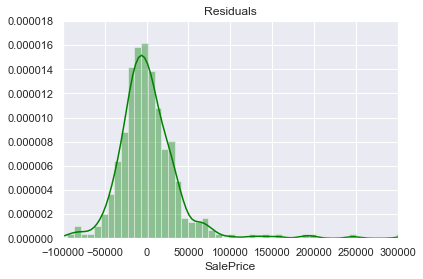

In [33]:
sb.distplot(((y_test-predictions)), bins=50, color='green')
plt.xlim(-100000, 300000), plt.ylim(0, 0.000018), plt.title('Residuals')
plt.show()